In [1]:
## Notebook 3- GLM modeling and Regularization
# Daniel Sandoz

In [ ]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import urllib
from sklearn import preprocessing
from sklearn.model_selection  import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, scale
from sklearn.decomposition import PCA
from scipy.io import arff
from io import StringIO
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score, mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [11]:
crime = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data', header=None)
crime.shape
crime.head(10)


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
5,6,?,?,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,...,0.01,0.58,0.10,?,?,?,?,0.00,?,0.14
6,44,7,41500,Lincolntown,1,0.01,0.39,0.00,0.98,0.06,...,0.05,0.08,0.06,?,?,?,?,0.00,?,0.03
7,6,?,?,Selmacity,1,0.01,0.74,0.03,0.46,0.20,...,0.01,0.33,0.00,?,?,?,?,0.00,?,0.55
8,21,?,?,Hendersoncity,1,0.03,0.34,0.20,0.84,0.02,...,0.04,0.17,0.04,?,?,?,?,0.00,?,0.53
9,29,?,?,Claytoncity,1,0.01,0.40,0.06,0.87,0.30,...,0.00,0.47,0.11,?,?,?,?,0.00,?,0.15


In [12]:
# added columns
crime.columns = ['state','county','community','communityname string','fold','population','householdsize','racepctblack','racePctWhite','racePctAsian','racePctHisp','agePct12t21','agePct12t29','agePct16t24','agePct65up','numbUrban','pctUrban','medIncome','pctWWage','pctWFarmSelf','pctWInvInc','pctWSocSec','pctWPubAsst','pctWRetire','medFamInc','perCapInc','whitePerCap','blackPerCap','indianPerCap','AsianPerCap','OtherPerCap','HispPerCap','NumUnderPov','PctPopUnderPov','PctLess9thGrade','PctNotHSGrad'
,'PctBSorMore','PctUnemployed','PctEmploy','PctEmplManu','PctEmplProfServ','PctOccupManu','PctOccupMgmtProf','MalePctDivorce','MalePctNevMarr','FemalePctDiv','TotalPctDiv','PersPerFam','PctFam2Par','PctKids2Par','PctYoungKids2Par','PctTeen2Par','PctWorkMomYoungKids','PctWorkMom','NumIlleg','PctIlleg'
,'NumImmig','PctImmigRecent','PctImmigRec5','PctImmigRec8','PctImmigRec10','PctRecentImmig','PctRecImmig5','PctRecImmig8','PctRecImmig10','PctSpeakEnglOnly'
,'PctNotSpeakEnglWell','PctLargHouseFam','PctLargHouseOccup','PersPerOccupHous','PersPerOwnOccHous'
,'PersPerRentOccHous','PctPersOwnOccup','PctPersDenseHous','PctHousLess3BR','MedNumBR','HousVacant','PctHousOccup','PctHousOwnOcc'
,'PctVacantBoarded','PctVacMore6Mos','MedYrHousBuilt','PctHousNoPhone','PctWOFullPlumb','OwnOccLowQuart','OwnOccMedVal','OwnOccHiQuart','RentLowQ'
,'RentMedian','RentHighQ','MedRent','MedRentPctHousInc','MedOwnCostPctInc','MedOwnCostPctIncNoMtg','NumInShelters','NumStreet','PctForeignBorn'
,'PctBornSameState','PctSameHouse85','PctSameCity85','PctSameState85','LemasSwornFT','LemasSwFTPerPop','LemasSwFTFieldOps','LemasSwFTFieldPerPop'
,'LemasTotalReq','LemasTotReqPerPop','PolicReqPerOffic','PolicPerPop','RacialMatchCommPol','PctPolicWhite','PctPolicBlack','PctPolicHisp','PctPolicAsian','PctPolicMinor','OfficAssgnDrugUnits','NumKindsDrugsSeiz','PolicAveOTWorked','LandArea','PopDens','PctUsePubTrans','PolicCars','PolicOperBudg'
,'LemasPctPolicOnPatr','LemasGangUnitDeploy','LemasPctOfficDrugUn','PolicBudgPerPop'
,'ViolentCrimesPerPop']

In [13]:
# check headers
crime.head(10)

,state,county,community,communityname string,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
5,6,?,?,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,...,0.01,0.58,0.10,?,?,?,?,0.00,?,0.14
6,44,7,41500,Lincolntown,1,0.01,0.39,0.00,0.98,0.06,...,0.05,0.08,0.06,?,?,?,?,0.00,?,0.03
7,6,?,?,Selmacity,1,0.01,0.74,0.03,0.46,0.20,...,0.01,0.33,0.00,?,?,?,?,0.00,?,0.55
8,21,?,?,Hendersoncity,1,0.03,0.34,0.20,0.84,0.02,...,0.04,0.17,0.04,?,?,?,?,0.00,?,0.53
9,29,?,?,Claytoncity,1,0.01,0.40,0.06,0.87,0.30,...,0.00,0.47,0.11,?,?,?,?,0.00,?,0.15


In [14]:
# check all column names
crime.columns

Index(['state', 'county', 'community', 'communityname string', 'fold',
       'population', 'householdsize', 'racepctblack', 'racePctWhite',
       'racePctAsian',
       ...
       'LandArea', 'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg',
       'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn',
       'PolicBudgPerPop', 'ViolentCrimesPerPop'],
      dtype='object', length=128)

In [15]:
# designating target variable
targetName = 'ViolentCrimesPerPop'
targetSeries = crime[targetName]

# removing target from current location and insert in column 0
del crime[targetName]
crime.insert(0, targetName, targetSeries)

In [16]:
crime.describe()

,ViolentCrimesPerPop,state,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,0.237979,28.683551,5.493982,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,...,0.022778,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.094052
std,0.232985,16.397553,2.873694,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,...,0.100400,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.240328
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.070000,12.000000,3.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,...,0.000000,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.000000
50%,0.150000,34.000000,5.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,...,0.000000,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.000000
75%,0.330000,42.000000,8.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,...,0.000000,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.000000
max,1.000000,56.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
crime.info(128)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 128 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ViolentCrimesPerPop    float64
 1   state                  int64  
 2   county                 object 
 3   community              object 
 4   communityname string   object 
 5   fold                   int64  
 6   population             float64
 7   householdsize          float64
 8   racepctblack           float64
 9   racePctWhite           float64
 10  racePctAsian           float64
 11  racePctHisp            float64
 12  agePct12t21            float64
 13  agePct12t29            float64
 14  agePct16t24            float64
 15  agePct65up             float64
 16  numbUrban              float64
 17  pctUrban               float64
 18  medIncome              float64
 19  pctWWage               float64
 20  pctWFarmSelf           float64
 21  pctWInvInc             float64
 22  pctWSocSec             

In [18]:
# data transformation
# copy data into df for manipulation
df = crime 

# perform data transformation
for col in df.columns[1:]:
	attName = col
	dType = df[col].dtype
	missing = pd.isnull(df[col]).any()
	uniqueCount = len(df[attName].value_counts(normalize=False))
	# discretize (create dummies)
	if dType == object:
		df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
		del df[attName]

# copy df back into data        
crime = df 

In [19]:
X = crime.iloc[:,1:].values
y = crime.iloc[:,0].values

In [20]:
# confirm target variable corresponds to X
X 
# confirm target variable corresponds to y
y 

array([0.2 , 0.67, 0.43, ..., 0.23, 0.19, 0.48])

In [24]:
# identifing df target and features before regression
crime.target=crime['ViolentCrimesPerPop'] 
crime.features=crime.drop(['ViolentCrimesPerPop'], axis=1)                         
print(crime.target.shape)
print(crime.features.shape)

(1994,)
(1994, 4115)


In [25]:
# check target variable
print(crime.target.head(10))

0    0.20
1    0.67
2    0.43
3    0.12
4    0.03
5    0.14
6    0.03
7    0.55
8    0.53
9    0.15
Name: ViolentCrimesPerPop, dtype: float64


In [26]:
# check feature variable
print(crime.features.head(10))

   state  fold  population  householdsize  racepctblack  racePctWhite  \
0      8     1        0.19           0.33          0.02          0.90   
1     53     1        0.00           0.16          0.12          0.74   
2     24     1        0.00           0.42          0.49          0.56   
3     34     1        0.04           0.77          1.00          0.08   
4     42     1        0.01           0.55          0.02          0.95   
5      6     1        0.02           0.28          0.06          0.54   
6     44     1        0.01           0.39          0.00          0.98   
7      6     1        0.01           0.74          0.03          0.46   
8     21     1        0.03           0.34          0.20          0.84   
9     29     1        0.01           0.40          0.06          0.87   

   racePctAsian  racePctHisp  agePct12t21  agePct12t29  ...  \
0          0.12         0.17         0.34         0.47  ...   
1          0.45         0.07         0.26         0.59  ...   
2      

In [ ]:
## A: Build Models


In [67]:
## Data Paritition 60/40
features_train, features_test, target_train, target_test = train_test_split(
    crime.iloc[:,1:].values, crime.iloc[:,0].values, test_size=0.40, random_state=0)

In [ ]:
## Ridge Regression

In [68]:
# Call up model 
rr_model = Ridge(alpha=5)
# fit model
crime_rr = rr_model.fit(features_train, target_train)
print(crime_rr)

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


In [69]:
# model predictions
expected_rr = target_test
predicted_rr = crime_rr.predict(features_test)

# summarize fit
print('Coef:',crime_rr.intercept_,crime_rr.coef_)
print('MSE:',mean_squared_error(expected_rr,predicted_rr))
print('RMSE:',np.sqrt(mean_squared_error(expected_rr,predicted_rr)))
print('MAE:',mean_absolute_error(expected_rr,predicted_rr))
print('R2 score:',r2_score(expected_rr,predicted_rr))

Coef: 0.45636521336045865 [-0.0006319  -0.00343633  0.00372863 ...  0.         -0.01573075
 -0.00332832]
MSE: 0.019567081018336856
RMSE: 0.13988238280189846
MAE: 0.09921001525643662
R2 score: 0.6232832518581943


In [ ]:
## Optimizing Ridge Regression

In [70]:
# GridSearch 1

# import package
from sklearn.model_selection import GridSearchCV
# choose range, starting big
param_grid ={"alpha": [5,20,50,100]} 

# perform grid search
grid_search_rr = GridSearchCV(rr_model, param_grid=param_grid,n_jobs=1,cv=10)
grid_search_rr.fit(features_train,target_train)

# print results
print('Best:',grid_search_rr.best_params_)

Best: {'alpha': 20}


In [71]:
# GridSearch 2

from sklearn.model_selection import GridSearchCV
# choose range, getting smaller
param_grid ={"alpha": [1,2,3,4,5,6,7,8]} 

# perform grid search
grid_search_rr = GridSearchCV(rr_model, param_grid=param_grid,n_jobs=1,cv=10)
grid_search_rr.fit(features_train,target_train)

# print results
print('Best:',grid_search_rr.best_params_)

Best: {'alpha': 8}


In [72]:
# GridSearch 3

from sklearn.model_selection import GridSearchCV
# choose range, best
param_grid ={"alpha": [2.5,3,3.5,4,4.5,5]}

# perform grid search
grid_search_rr = GridSearchCV(rr_model, param_grid=param_grid,n_jobs=1,cv=10)
grid_search_rr.fit(features_train,target_train)

# print results
print('Best:',grid_search_rr.best_params_)

Best: {'alpha': 5}


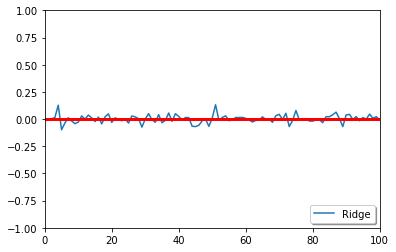

In [73]:
# analyzing coeffecients 
fig, ax = plt.subplots()
plt.plot(crime_rr.coef_, label='Ridge')
plt.axhline(linewidth=3,color = 'r') # reference line
legend = ax.legend(loc='lower right', shadow=True)
axes = plt.gca()
axes.set_ylim([-1,1])
axes.set_xlim([0,100])
plt.show()

In [86]:
# cross validation (for gigs)
cv_scores_rr = cross_val_score(crime_rr, features_train, target_train, cv=10,scoring='r2')
print('CV Score for each K', cv_scores_rr)
print('CV mean score: ', cv_scores_rr.mean())

CV Score for each K [0.64198009 0.60968172 0.64830978 0.60085644 0.69450435 0.54328706
 0.532285   0.65512129 0.69499535 0.70542288]
CV mean score:  0.6326443977616244


In [ ]:
## Interpretation

In [ ]:
# The Optimized Ridge Regression Model returned fairly low errors: MSE = .02;
# RMSE = .139; MAE = .10. The model also returns back an R^2 of .623
# meaning that this ridge regression model is able to explain 61% of 
# the variance (which is vairly high considering the amount of features
# in the data set). The nature of Ridge Regression forces the model
# to consider all features in the data set. GridSearch allowed for the optimization of
# all features. This package narrowed the alpha down to five when considering
# all features. This is alphas relates to the penalty that adds bias to 
# data that contains many vaiables (columns) and not many data points (rows)
# while still considering accuracy.
# When considering the cross validation score (.63), this model returns
# a high accuracy when compared to out-of-sample data.
# It may be possible to increase this accuracy with other models
# that do not hold users to consider all features, possibly increasing accuracy
# while employing a computationally cheaper approach.

In [ ]:
## Lasso Regression

In [74]:
# call model
las_model = Lasso(alpha=2.5)

# fit model
crime_las = las_model.fit(features_train,target_train)
print(crime_las)

Lasso(alpha=2.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [75]:
# model predictions
expected_las = target_train
predicted_las = crime_las.predict(features_train)

# summarize fit
print('Coef:',crime_las.intercept_,crime_las.coef_)
print('MSE:',mean_squared_error(expected_las,predicted_las))
print('RMSE:',np.sqrt(mean_squared_error(expected_las,predicted_las)))
print('MAE:',mean_absolute_error(expected_las,predicted_las))
print('R2 score:',r2_score(expected_las,predicted_las))

Coef: 0.24267558528428093 [-0. -0.  0. ...  0. -0. -0.]
MSE: 0.055743342915627346
RMSE: 0.23610028148146572
MAE: 0.1817898569367233
R2 score: 0.0


In [55]:
# print scores
scores_las = cross_val_score(crime_las, features_train, target_train, cv=10,scoring='r2')
print('CV Score for each K', scores_las)
print('CV mean score: ', scores_las.mean())

CV Score for each K [-3.16648154e-02 -7.11079865e-07 -1.64701360e-02 -1.42842461e-04
 -4.61150191e-02 -4.36330855e-02 -4.41072689e-03 -4.85977137e-02
 -9.18643950e-05 -1.95988993e-03]
CV mean score:  -0.019308680446389382


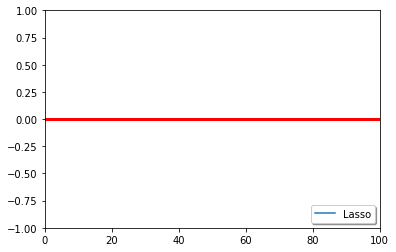

In [56]:
# analyzing coeffecients 
fig, ax = plt.subplots()
plt.plot(crime_las.coef_, label='Lasso')
plt.axhline(linewidth=3,color = 'r') # reference line
legend = ax.legend(loc='lower right', shadow=True)
axes = plt.gca()
axes.set_ylim([-1,1])
axes.set_xlim([0,100])
plt.show()

In [ ]:
## Interpretation 

In [ ]:
# The Optimized Lasso Regression Model returned fairly low errors: 
# MSE = .05; RMSE = .24; MAE = .18. However, the model also retuned 
# an R^2 value of 0.0. With this, it seems that the Lasso Regression Model 
# GridSearch funcation optimized the parameters by heavily
# reducing the number of variables to result in practically zero 
# model variance. The cross validation score is also very low.
# This does not build a good case for model deployment.

In [ ]:
## Elastic-Net Regression

In [76]:
# call model
er_model = ElasticNet(alpha=.01)

# fit model
crime_er = er_model.fit(features_train,target_train)
print(crime_er)

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


In [77]:
# model predictions
expected_er = target_test
predicted_er = crime_er.predict(features_test)

# summarize fit
print('Coef:',crime_er.intercept_,crime_er.coef_)
print('MSE:',mean_squared_error(expected_er,predicted_er))
print('RMSE:',np.sqrt(mean_squared_error(expected_er,predicted_er)))
print('MAE:',mean_absolute_error(expected_er,predicted_er))
print('R2 score:',r2_score(expected_er,predicted_er))

Coef: 0.5109278771596495 [-0.00158461 -0.00259222  0.         ...  0.         -0.
 -0.00195996]
MSE: 0.01938659126751149
RMSE: 0.1392357399072217
MAE: 0.09894034368758414
R2 score: 0.6267581448143864


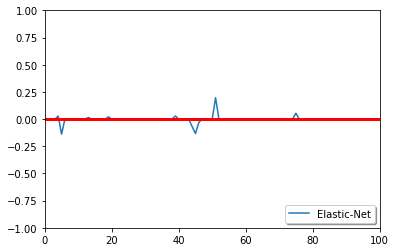

In [78]:
# analyzing coefficients 
fig, ax = plt.subplots()
plt.plot(crime_er.coef_, label='Elastic-Net')
plt.axhline(linewidth=3,color = 'r') # reference line
legend = ax.legend(loc='lower right', shadow=True)
axes = plt.gca()
axes.set_ylim([-1,1])
axes.set_xlim([0,100])
plt.show()

In [79]:
# GridSearch 

# choose range
param_grid = {'alpha': [.01,.1,.25,.5,1,3]}

# perform grid search
grid_search_er = GridSearchCV(er_model, param_grid=param_grid,n_jobs=1,cv=10)
grid_search_er.fit(features_train,target_train)

# print results
print('Best:',grid_search_er.best_params_)

Best: {'alpha': 0.01}


In [85]:
# cross validation
cv_scores_er = cross_val_score(crime_er, features_train, target_train, cv=10, scoring='r2')
print('CV Score for each K', cv_scores_er)
print('CV mean score: ', cv_scores_er.mean())

CV Score for each K [0.59423436 0.60663738 0.62640257 0.56690056 0.67191495 0.52455082
 0.55500112 0.64171815 0.64738696 0.58648129]
CV mean score:  0.6021228149488944


In [ ]:
## Interpretation

In [ ]:
# The Optimized Elastic-Net Regression Model also returned very low errors:
# MSE = .01; RMSE = .14; MAE = .01. This model also returned an R^2 value 
# of R^2 = .627 meaning that the Elastic-Net Regression Model was able to
# explain ~ 63% of the variance found in the data which is considerably high
# and compareable to that of the Ridge Regession Model. The cross validation 
# score is also very strong at .60, which refers to the out of sample accuracy
# of this model. 

In [ ]:
## Linear Regression

In [ ]:
# To act as a baseline of comparison, I will be delpoying a basic linear 
# regression model. However basic, this model has potential to accurately 
# predict outcomes and can be easily interpreted. This will act as a 
# basic model used for compairson purposes.

In [81]:
# call model
lr_model = LinearRegression(normalize=True)
crime_lr = lr_model.fit(features_train, target_train)
print(crime_lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


In [82]:
# model predictions
expected_lr = target_test
predicted_lr = crime_lr.predict(features_test)

# summarize fit
print('Coef:',crime_lr.intercept_,crime_lr.coef_)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print('MSE:',mean_squared_error(expected_lr,predicted_lr))
print('RMSE:',np.sqrt(mean_squared_error(expected_lr,predicted_lr)))
print('MAE:',mean_absolute_error(expected_lr,predicted_lr))
print('R2 score:',r2_score(expected_lr,predicted_lr))

Coef: 0.32881701740409564 [-0.00053721 -0.00381116  0.0293668  ...  0.         -0.02510968
 -0.0018007 ]
MSE: 0.045976439534711665
RMSE: 0.21442117324255006
MAE: 0.16108692757957724
R2 score: 0.11483502437467374


In [83]:
#cross validation
cv_scores_lr = cross_val_score(crime_lr, features_train, target_train, cv=10,scoring='r2')
print('CV Score for each K', cv_scores_lr)
print('CV mean score: ', cv_scores_lr.mean())

CV Score for each K [ 0.31992901  0.22925524  0.33674182  0.09952196  0.28709493  0.3430468
 -0.27141696  0.3579268   0.31253832  0.32712954]
CV mean score:  0.2341767458745146


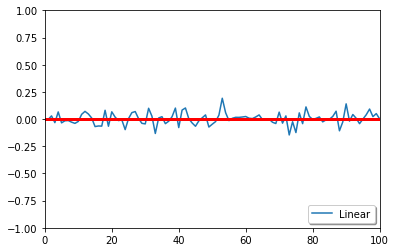

In [84]:
# analyzing coefficients
fig, ax = plt.subplots()
plt.plot(crime_lr.coef_, label='Linear')
plt.axhline(linewidth=3,color = 'r') # reference line
legend = ax.legend(loc='lower right', shadow=True)
axes = plt.gca()
axes.set_ylim([-1,1])
axes.set_xlim([0,100])
plt.show()

In [ ]:
# The Linear Regression model returned low errors: MSE = .046; 
# RMSE = .21; MAE = .16. However, the model returned an R^2 of 
# R^2 = .11. This means that 11% of the variance found in the data set
# can be explained by the Linear Regression model. This is very low, 
# and can possibly be attributed to the large amount of features in the
# data set. This model also returns a very low cross validation score
# at .23 which shows low out-of-sample accuracy and
# weakens its arguement for depolyment. 

In [ ]:
## Model Compairison 

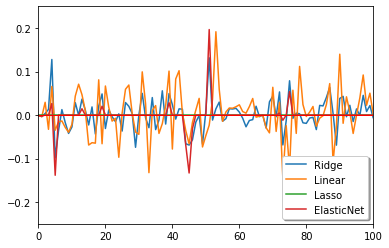

In [88]:
fig, ax = plt.subplots()
plt.plot(crime_rr.coef_, label='Ridge')
plt.plot(crime_lr.coef_, label='Linear')
plt.plot(crime_las.coef_, label='Lasso')
plt.plot(crime_er.coef_, label='ElasticNet')
plt.axhline(linewidth=1,color = 'r') # reference line
legend = ax.legend(loc='lower right', shadow=True)
axes = plt.gca()
axes.set_ylim([-.25,.25])
axes.set_xlim([0,100])
plt.show()

In [ ]:
## Interpretation Summary

In [ ]:
# All models used here have both positive and negative components.
# More data interpretation and investigation is needed in order to 
# justify deployment to manufacturing. To increase justification, it
# is necessary to employ cross validation and GridSearch techniques on
# more data. When choosing a regression model from above, it is difficult
# to decide between Elastic-Net and Ridge, as the other two lacked in 
# accuracy. Elastic-Net and Ridge models both have practically the same 
# R^2 value, and they are both very close in their cross validation 
# scores with Ridge being slightly more accurate. However, when considering
# the computational-resource/percent-accuracy trade-off on a manufacturing
# level of deployment, given the outputs from above, I would propse the 
# Elastic-Net regression model from above due to computational resources
# spared on a large scale when using GridSearch. 